# SIT 720 - Machine Learning

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 219446914

# Student name: Nhu Hoang Ha Bui

## The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




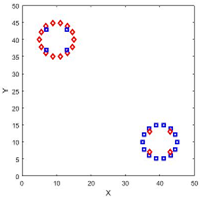


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

For the given figure, one can see that both the regions have a total of 14 common points(which needs to be together) and 4 different points(of another type). Hence, for leave-one-out cross-validation, the best value of k will be 14.
The accuracy in this case would be :- (28/36) i.e. 0.7777 (77.77%)
Hence the final answer is: k = 14, Accuracy = 77.77%

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

Yes, random forests can overfit and underfit as well. It is simply a misconception that they can't. the reason being, Random forests are typically constructed of fully grown decision trees with high-variance, low-bias, and their power comes from the reduction in variance that comes from the average of these trees. However, if the trees' predictions are too close to each other then the impact of variance reduction is reduced, and they may end up being overfitted. And for underfitting, every ML algorithm can underfit if it does not do well in training and nor in testing.

## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')



data = pd.read_csv('chronic_kidney_disease.csv')
pd.set_option('display.max_columns', None)

FileNotFoundError: [Errno 2] File chronic_kidney_disease.csv does not exist: 'chronic_kidney_disease.csv'

In [ ]:
data.head()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null int64
pc       400 non-null int64
pcc      400 non-null int64
ba       400 non-null int64
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null int64
wbcc     400 non-null int64
rbcc     400 non-null float64
htn      400 non-null int64
dm       400 non-null int64
cad      400 non-null int64
appet    400 non-null int64
pe       400 non-null int64
ane      400 non-null int64
class    400 non-null object
dtypes: float64(1), int64(12), object(12)
memory usage: 78.2+ KB


In [2]:
objects = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']
for col in objects:
    data[col] = data[col].str.replace('?','0')
    data[col] = pd.to_numeric(data[col],downcast="float")

NameError: name 'data' is not defined

In [3]:
y = data['class']
# Dropped columns sod and pot as they had more than half values as 0.0 (i.e. '?')
x = data.drop(['class','sod','pot'],axis=1)
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)

NameError: name 'data' is not defined

## Splitting

In [10]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# SVM

In [11]:
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='linear')
svclassifier2 = SVC(kernel='rbf')
svclassifier1.fit(X_train, Y_train)
svclassifier2.fit(X_train, Y_train)
y_pred_svm1 = svclassifier1.predict(X_test)
y_pred_svm2 = svclassifier2.predict(X_test)

D:\Anaconda-3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
print("Accuracy on training dataset(Linear):{:.1f}".format(svclassifier1.score(X_train,Y_train)))
print("Accuracy on testing dataset(Linear):{:.1f}".format(accuracy_score(Y_test, y_pred_svm1)))
print('')
print("Accuracy on training dataset(RBF):{:.1f}".format(svclassifier2.score(X_train,Y_train)))
print("Accuracy on testing dataset(RBF):{:.1f}".format(accuracy_score(Y_test, y_pred_svm2)))

Accuracy on training dataset(Linear):1.0
Accuracy on testing dataset(Linear):1.0

Accuracy on training dataset(RBF):1.0
Accuracy on testing dataset(RBF):0.6


B) 
1. I changed the kernel parameter to be linear and rbf.
2. The range of kernel parameter chosen for testing was ['linear', 'rbf']
3. Accuracy score was used to meausre the performance (both on training and testing sets)
4. By changing  the kernel we can control the model(SVM) far better than any other hyperparameter, and in this case we were able to achieve great results too in case of linear kernel.

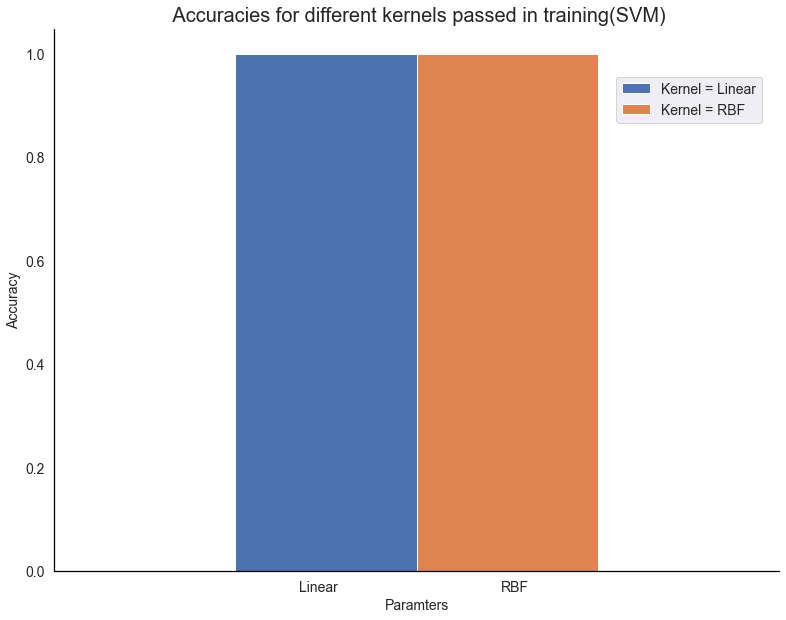

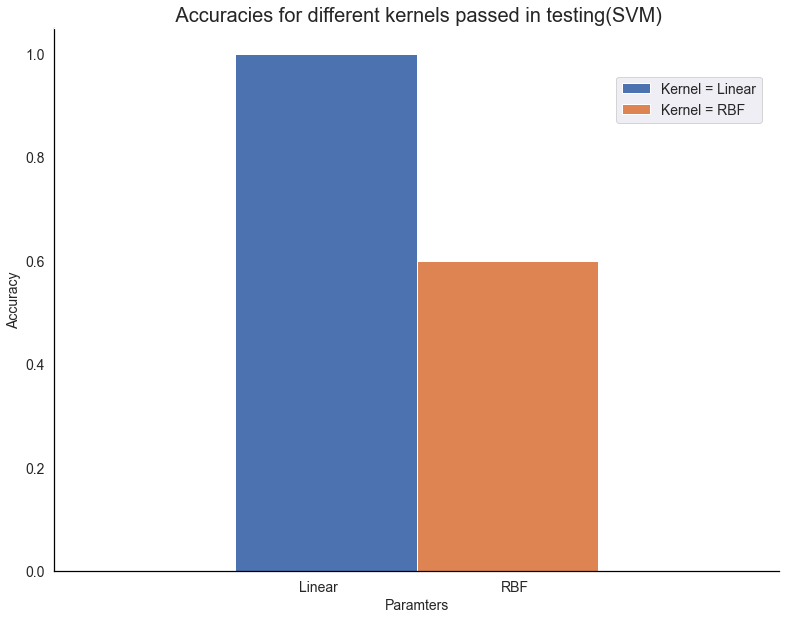

In [13]:
# Plotting

# Making a dataframe of the accuracies
a = {'Kernel = Linear': [1.0], 'Kernel = RBF': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['Linear', 'RBF']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different kernels passed in training(SVM)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Making a dataframe of the accuracies
a = {'Kernel = Linear': [1.0], 'Kernel = RBF': [0.6]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['Linear', 'RBF']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different kernels passed in testing(SVM)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


In [14]:
# Evaluating testing data 
print('Accuracies:')
print("Accuracy on testing dataset(Linear):{:.1f}".format(accuracy_score(Y_test, y_pred_svm1)))
print("Accuracy on testing dataset(RBF):{:.1f}".format(accuracy_score(Y_test, y_pred_svm2)))
print('F1 scores:')
print("F1 Score on testing dataset(Linear):{:.1f}".format(f1_score(Y_test, y_pred_svm1)))
print("F1 Score on testing dataset(RBF):{:.1f}".format(f1_score(Y_test, y_pred_svm2)))
print('Confusion matrices')
print("Confusion matrix on testing dataset(Linear):")
print(confusion_matrix(Y_test, y_pred_svm1))
print("Confusion matrix on testing dataset(RBF):")
print(confusion_matrix(Y_test, y_pred_svm2))

Accuracies:
Accuracy on testing dataset(Linear):1.0
Accuracy on testing dataset(RBF):0.6
F1 scores:
F1 Score on testing dataset(Linear):1.0
F1 Score on testing dataset(RBF):0.0
Confusion matrices
Confusion matrix on testing dataset(Linear):
[[66  4]
 [ 1 49]]
Confusion matrix on testing dataset(RBF):
[[70  0]
 [50  0]]


D:\Anaconda-3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifierUniform = KNeighborsClassifier(n_neighbors=5, weights="uniform")
classifierDistance = KNeighborsClassifier(n_neighbors=5, weights="distance")
classifierUniform.fit(X_train, Y_train)
classifierDistance.fit(X_train, Y_train)
y_predi_knndi = classifierDistance.predict(X_test)
y_predi_knnun = classifierUniform.predict(X_test)

In [16]:
print("Accuracy on training dataset(Uniform):{:.1f}".format(classifierUniform.score(X_train,Y_train)))
print("Accuracy on testing dataset(Uniform):{:.1f}".format(accuracy_score(Y_test, y_predi_knnun)))
print('')
print("Accuracy on training dataset(Distance):{:.1f}".format(classifierDistance.score(X_train,Y_train)))
print("Accuracy on testing dataset(Distance):{:.1f}".format(accuracy_score(Y_test, y_predi_knndi)))

Accuracy on training dataset(Uniform):0.8
Accuracy on testing dataset(Uniform):0.8

Accuracy on training dataset(Distance):1.0
Accuracy on testing dataset(Distance):0.8


B) 
1. I kept n_neighbors as 5 but changed the weights parameter (distance and uniform) to see which one produces better results.
2. The range of values for weight was [distance, uniform]
3. Accuracy score was used to meausre the performance (both on training and testing sets)
4. Chaning n_neighbors had no impact so i tried changing the weights parameter and was able to secure 100% accuracy on training and 80% on testing data set.

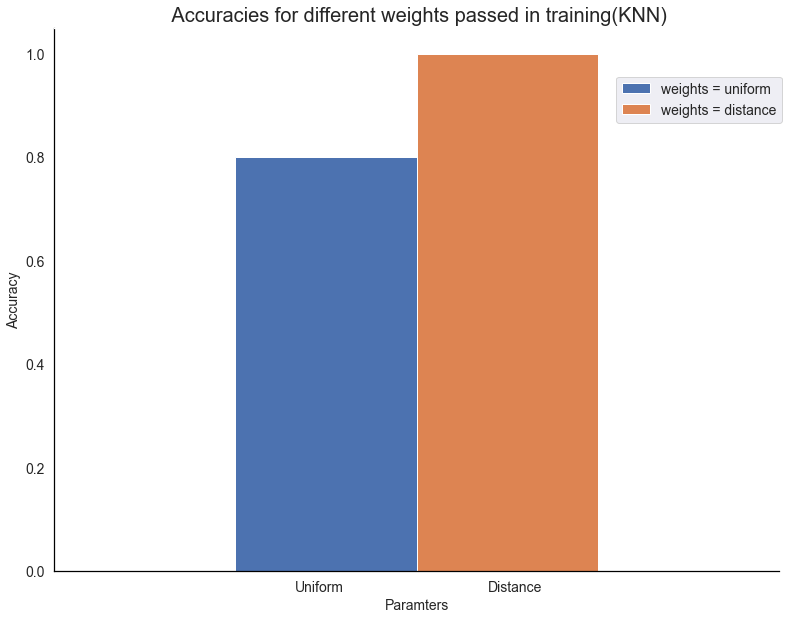

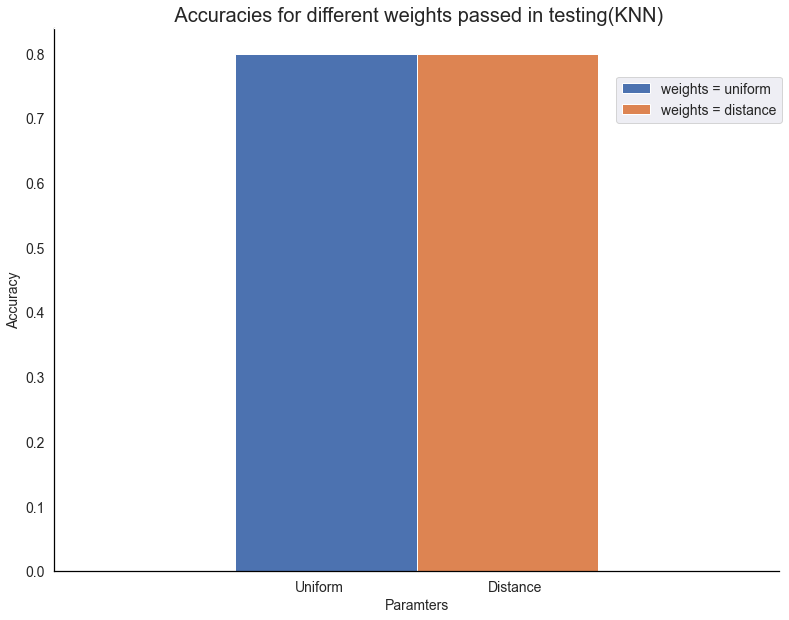

In [17]:
# Plotting

# Making a dataframe of the accuracies
a = {'weights = uniform': [0.8], 'weights = distance': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['Uniform', 'Distance']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different weights passed in training(KNN)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


# Making a dataframe of the accuracies
a = {'weights = uniform': [0.8], 'weights = distance': [0.8]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['Uniform', 'Distance']
xticks = [-0.135, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different weights passed in testing(KNN)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


In [18]:
# Evaluating testing data 
print('Accuracies:')
print("Accuracy on testing dataset(Uniform):{:.1f}".format(accuracy_score(Y_test, y_predi_knnun)))
print("Accuracy on testing dataset(Distance):{:.1f}".format(accuracy_score(Y_test, y_predi_knndi)))
print('F1 scores:')
print("F1 Score on testing dataset(Uniform):{:.1f}".format(f1_score(Y_test, y_predi_knnun)))
print("F1 Score on testing dataset(Distance):{:.1f}".format(f1_score(Y_test, y_predi_knndi)))
print('Confusion matrices')
print("Confusion matrix on testing dataset(Uniform):")
print(confusion_matrix(Y_test, y_predi_knnun))
print("Confusion matrix on testing dataset(Distance):")
print(confusion_matrix(Y_test, y_predi_knndi))

Accuracies:
Accuracy on testing dataset(Uniform):0.8
Accuracy on testing dataset(Distance):0.8
F1 scores:
F1 Score on testing dataset(Uniform):0.7
F1 Score on testing dataset(Distance):0.8
Confusion matrices
Confusion matrix on testing dataset(Uniform):
[[53 17]
 [10 40]]
Confusion matrix on testing dataset(Distance):
[[53 17]
 [ 8 42]]


# DT

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree_1 = DecisionTreeClassifier(max_depth=1)
dtree_2 = DecisionTreeClassifier(max_depth=2)
dtree_3 = DecisionTreeClassifier(max_depth=3)
dtree_1.fit(X_train, Y_train)
dtree_2.fit(X_train, Y_train)
dtree_3.fit(X_train, Y_train)
y_pred_dt_1 = dtree_1.predict(X_test)
y_pred_dt_2 = dtree_2.predict(X_test)
y_pred_dt_3 = dtree_3.predict(X_test)

In [20]:
print("Accuracy on training dataset(Max Depth = 1):{:.1f}".format(dtree_1.score(X_train,Y_train)))
print("Accuracy on testing dataset(Max Depth = 1):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_1)))
print('')
print("Accuracy on training dataset(Max Depth = 2):{:.1f}".format(dtree_2.score(X_train,Y_train)))
print("Accuracy on testing dataset(Max Depth = 2):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_2)))
print('')
print("Accuracy on training dataset(Max Depth = 3):{:.1f}".format(dtree_3.score(X_train,Y_train)))
print("Accuracy on testing dataset(Max Depth = 3):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_3)))

Accuracy on training dataset(Max Depth = 1):0.9
Accuracy on testing dataset(Max Depth = 1):0.9

Accuracy on training dataset(Max Depth = 2):1.0
Accuracy on testing dataset(Max Depth = 2):1.0

Accuracy on training dataset(Max Depth = 3):1.0
Accuracy on testing dataset(Max Depth = 3):1.0


B) 
1. I kept everything as default and changed max_depth of the decision tree three times.
2. The range of values for max_depth was [1, 2, 3]
3. Accuracy score was used to meausre the performance (both on training and testing sets)
4. I decided to change a few parameters and as i adjusted the max_depth, the accuracy increased and hence i was able to get 100% accuracy for both training and testing data sets in case od Decision tree too.

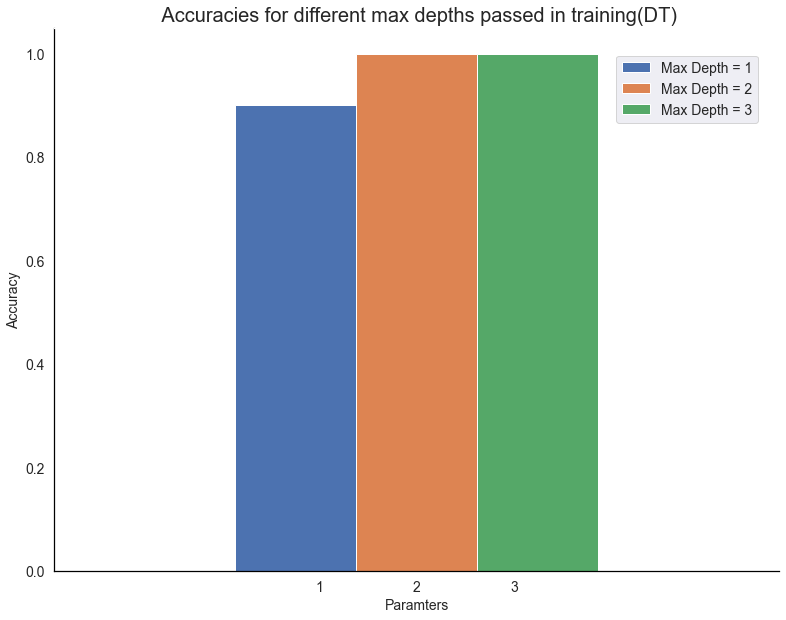

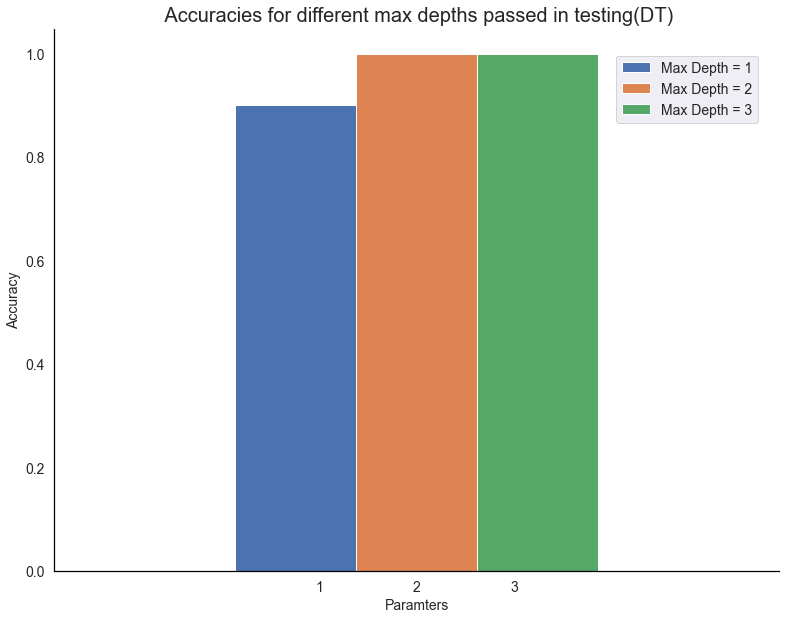

In [21]:
# Plotting

# Making a dataframe of the accuracies
a = {'Max Depth = 1': [0.9], 'Max Depth = 2': [1.0], 'Max Depth = 3': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['1', '2','3']
xticks = [-0.135,0, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different max depths passed in training(DT)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Making a dataframe of the accuracies
a = {'Max Depth = 1': [0.9], 'Max Depth = 2': [1.0], 'Max Depth = 3': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['1', '2','3']
xticks = [-0.135,0, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different max depths passed in testing(DT)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


In [22]:
# Evaluating testing data 
print('Accuracies:')
print("Accuracy on testing dataset(Max Depth = 1):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_1)))
print("Accuracy on testing dataset(Max Depth = 2):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_2)))
print("Accuracy on testing dataset(Max Depth = 3):{:.1f}".format(accuracy_score(Y_test, y_pred_dt_3)))
print('F1 scores:')
print("F1 Score on testing dataset(Max Depth = 1):{:.1f}".format(f1_score(Y_test, y_pred_dt_1)))
print("F1 Score on testing dataset(Max Depth = 2):{:.1f}".format(f1_score(Y_test, y_pred_dt_2)))
print("F1 Score on testing dataset(Max Depth = 3):{:.1f}".format(f1_score(Y_test, y_pred_dt_3)))
print('Confusion matrices')
print("Confusion matrix on testing dataset(Max Depth = 1):")
print(confusion_matrix(Y_test, y_pred_dt_1))
print("Confusion matrix on testing dataset(Max Depth = 2):")
print(confusion_matrix(Y_test, y_pred_dt_2))
print("Confusion matrix on testing dataset(Max Depth = 3):")
print(confusion_matrix(Y_test, y_pred_dt_3))

Accuracies:
Accuracy on testing dataset(Max Depth = 1):0.9
Accuracy on testing dataset(Max Depth = 2):1.0
Accuracy on testing dataset(Max Depth = 3):1.0
F1 scores:
F1 Score on testing dataset(Max Depth = 1):0.9
F1 Score on testing dataset(Max Depth = 2):1.0
F1 Score on testing dataset(Max Depth = 3):1.0
Confusion matrices
Confusion matrix on testing dataset(Max Depth = 1):
[[61  9]
 [ 2 48]]
Confusion matrix on testing dataset(Max Depth = 2):
[[70  0]
 [ 4 46]]
Confusion matrix on testing dataset(Max Depth = 3):
[[70  0]
 [ 1 49]]


# RFC

In [23]:
clf1=RandomForestClassifier(n_estimators=10)
clf2=RandomForestClassifier(n_estimators=100)
clf3=RandomForestClassifier(n_estimators=1000)
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)
y_predi1=clf1.predict(X_test)
y_predi2=clf2.predict(X_test)
y_predi3=clf3.predict(X_test)

In [24]:

print("Accuracy on training dataset(10 estimators):{:.1f}".format(clf1.score(X_train,Y_train)))
print("Accuracy on testing dataset(10 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi1)))
print('')
print("Accuracy on training dataset(100 estimators):{:.1f}".format(clf2.score(X_train,Y_train)))
print("Accuracy on testing dataset(100 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi2)))
print('')
print("Accuracy on training dataset(100 estimators):{:.1f}".format(clf3.score(X_train,Y_train)))
print("Accuracy on testing dataset(100 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi3)))

Accuracy on training dataset(10 estimators):1.0
Accuracy on testing dataset(10 estimators):1.0

Accuracy on training dataset(100 estimators):1.0
Accuracy on testing dataset(100 estimators):1.0

Accuracy on training dataset(100 estimators):1.0
Accuracy on testing dataset(100 estimators):1.0


B)
1. I changed the n_estimators parameter for random forest three times.
2. The range of inputs for n_estimators was: [10,100,1000]
3. Accuracy score was used to meausre the performance (both on training and testing sets)
4. I chose n_estimators to be 10 in the starting and it gave 100% accuracy. I tried to tweak it a little to see if it affects but it didn't and always yield 100% accuracy!

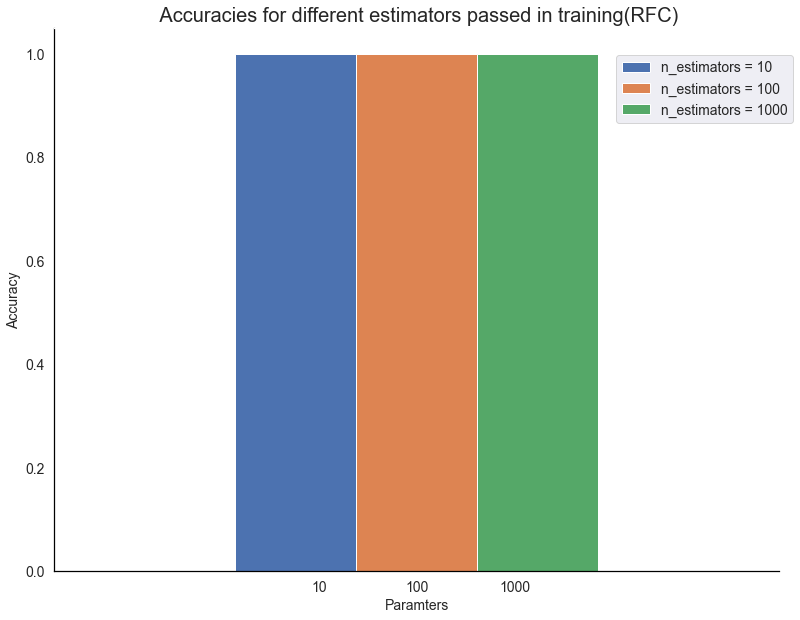

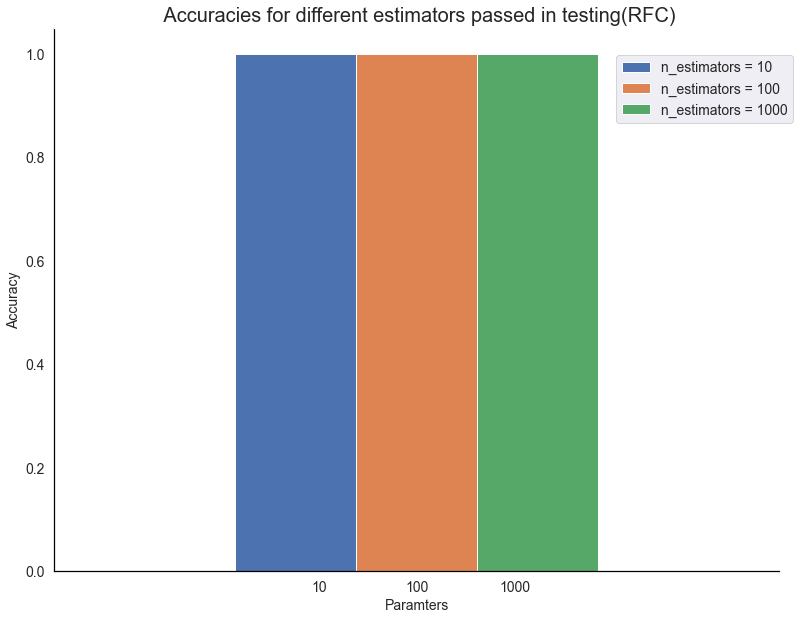

In [25]:
# Plotting

# Making a dataframe of the accuracies
a = {'n_estimators = 10': [1.0], 'n_estimators = 100': [1.0], 'n_estimators = 1000': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['10', '100','1000']
xticks = [-0.135,0, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different estimators passed in training(RFC)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


# Making a dataframe of the accuracies
a = {'n_estimators = 10': [1.0], 'n_estimators = 100': [1.0], 'n_estimators = 1000': [1.0]}
accuracies = pd.DataFrame(data=a)

# making bar plot comparing the accuracies of the models
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Paramters', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['10', '100','1000']
xticks = [-0.135,0, 0.135]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' Accuracies for different estimators passed in testing(RFC)', fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

In [26]:
# Evaluating testing data 
print('Accuracies:')
print("Accuracy on testing dataset(10 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi1)))
print("Accuracy on testing dataset(100 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi2)))
print("Accuracy on testing dataset(100 estimators):{:.1f}".format(accuracy_score(Y_test, y_predi3)))
print('F1 scores:')
print("F1 Score on testing dataset(10 estimators):{:.1f}".format(f1_score(Y_test, y_predi1)))
print("F1 Score on testing dataset(100 estimators):{:.1f}".format(f1_score(Y_test, y_predi2)))
print("F1 Score on testing dataset(100 estimators):{:.1f}".format(f1_score(Y_test, y_predi3)))
print('Confusion matrices')
print("Confusion matrix on testing dataset(10 estimators):")
print(confusion_matrix(Y_test, y_predi1))
print("Confusion matrix on testing dataset(100 estimators):")
print(confusion_matrix(Y_test, y_predi2))
print("Confusion matrix on testing dataset(1000 estimators):")
print(confusion_matrix(Y_test, y_predi3))

Accuracies:
Accuracy on testing dataset(10 estimators):1.0
Accuracy on testing dataset(100 estimators):1.0
Accuracy on testing dataset(100 estimators):1.0
F1 scores:
F1 Score on testing dataset(10 estimators):1.0
F1 Score on testing dataset(100 estimators):1.0
F1 Score on testing dataset(100 estimators):1.0
Confusion matrices
Confusion matrix on testing dataset(10 estimators):
[[70  0]
 [ 1 49]]
Confusion matrix on testing dataset(100 estimators):
[[70  0]
 [ 0 50]]
Confusion matrix on testing dataset(1000 estimators):
[[70  0]
 [ 0 50]]


## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**

In Part 2, we tried with 4 different models to solve the same problem of predicting the chronic kidney disease from the given input. Every model was trained with several parameters to see which parameter value fits the best. By looking at the results, we can easily see that on the training data, Random forest and Support vector machine performed the best regardless of any parameter changes. While Decision tree also gave 100% accuracy when the Max depth was kept 2. KNN gave 100% accuracy but only when weights were calculated based on distance. 

On the other hand, if we talk about Testing data, Random forest was the best as it was able to secure 100% accuracy again while the others fell short of it (in case of some parameters). KNN was the least favorite in this case because it yield only 80% accuracy throughout testing. SVM and Decision tree can also be considered as best if applied with the recommended parameters (In the graphs)

Overall, we can conclude that RFC was consistent throughout and predicted the classes with an accuracy of 100%

In conclusion, we already have 2-3 models with 100% accuracy so there is no need to optimise them further. However, to improve the model performances in general, we should use GridSearchCV to get the best parameters and ultimately get the best results.